In [4]:
!pip install seaborn
!pip install pandas
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
# update
train = pd.read_csv('./train.csv', parse_dates= ['date'])
train

date  store  item  sales
0      2013-01-01      1     1     13
1      2013-01-02      1     1     11
2      2013-01-03      1     1     14
3      2013-01-04      1     1     13
4      2013-01-05      1     1     10
...           ...    ...   ...    ...
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

[913000 rows x 4 columns]

In [5]:
test = pd.read_csv('./test.csv', parse_dates= ['date'])
test

id       date  store  item
0          0 2018-01-01      1     1
1          1 2018-01-02      1     1
2          2 2018-01-03      1     1
3          3 2018-01-04      1     1
4          4 2018-01-05      1     1
...      ...        ...    ...   ...
44995  44995 2018-03-27     10    50
44996  44996 2018-03-28     10    50
44997  44997 2018-03-29     10    50
44998  44998 2018-03-30     10    50
44999  44999 2018-03-31     10    50

[45000 rows x 4 columns]

In [6]:
print('Min date from train set : ' + str(train['date'].min().date()))
print('Max date from train set : ' + str(train['date'].max().date()))

Min date from train set : 2013-01-01
Max date from train set : 2017-12-31


In [7]:
lag_size = (test['date'].max().date() - train['date'].max().date()).days 
print('Max date from train set : ' + str(train['date'].max().date()) )
print('Max date from test set : ' +str(test['date'].max().date()) )
print('Forecast lag size', lag_size)

Max date from train set : 2017-12-31
Max date from test set : 2018-03-31
Forecast lag size 90


In [8]:
dates = train.groupby('date', as_index = False)['sales'].sum()
stores = train.groupby(['store', 'date'], as_index = False)['sales'].sum()
items = train.groupby(['item', 'date'], as_index = False)['sales'].sum()

dates

date  sales
0    2013-01-01  13696
1    2013-01-02  13678
2    2013-01-03  14488
3    2013-01-04  15677
4    2013-01-05  16237
...         ...    ...
1821 2017-12-27  20378
1822 2017-12-28  21885
1823 2017-12-29  23535
1824 2017-12-30  24988
1825 2017-12-31  26420

[1826 rows x 2 columns]

In [9]:
stores

store       date  sales
0          1 2013-01-01   1316
1          1 2013-01-02   1264
2          1 2013-01-03   1305
3          1 2013-01-04   1452
4          1 2013-01-05   1499
...      ...        ...    ...
18255     10 2017-12-27   2221
18256     10 2017-12-28   2429
18257     10 2017-12-29   2687
18258     10 2017-12-30   2742
18259     10 2017-12-31   2939

[18260 rows x 3 columns]

In [10]:
items

item       date  sales
0         1 2013-01-01    133
1         1 2013-01-02     99
2         1 2013-01-03    127
3         1 2013-01-04    145
4         1 2013-01-05    149
...     ...        ...    ...
91295    50 2017-12-27    511
91296    50 2017-12-28    587
91297    50 2017-12-29    596
91298    50 2017-12-30    612
91299    50 2017-12-31    626

[91300 rows x 3 columns]

In [11]:
!pip install plotly
# !pip install "nbformat>=4.2.4.0" notebook
# !pip install ipython nbformat --upgrade
# !pip install jupyterlab jupyter-client --upgrade
import plotly.graph_objs as go 
from plotly.offline import iplot

plot_dates = go.Scatter(x = dates['date'], y = dates['sales'])
layout = go.Layout(title = 'Daily Sales', xaxis = dict(title= 'Date'), yaxis = dict(title = 'Sales'))
fig = go.Figure(data = [plot_dates], layout = layout)

iplot(fig)


In [12]:
plot_stores = [] 
for store in stores['store'].unique(): 
    c_store = stores[(stores['store'] == store)]
    plot_stores.append(go.Scatter(x=c_store['date'], y = c_store['sales'], name = ('Store ' + str(store))))
layout = go.Layout(title = 'Store daily sales', xaxis = dict(title='Date'), yaxis = dict(title = 'Sales'))
fig = go.Figure(data = plot_stores, layout = layout)

iplot(fig)

In [13]:
plot_items = []
for item in items ['item'].unique():
    c_items = items[(items['item'] == item)]
    plot_items.append(go.Scatter(x = c_items['date'], y = c_items['sales'], name = ('Item ' + str(item))))
layout = go.Layout(title = 'Item daily sales', xaxis = dict(title = 'Date'), yaxis = dict(title = 'Sales'))
fig = go.Figure(data = plot_items, layout = layout)

iplot(fig)

In [14]:
indexes_train = []
for i in range(train.store.nunique()*train.item.nunique()) :
    indexes_train = np.append(indexes_train, np.linspace(0, train.date.nunique()-1, train.date.nunique(), dtype = int))
    i = +1
indexes_train

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.823e+03, 1.824e+03,
       1.825e+03])

In [15]:
train["indexes"] = indexes_train
train

date  store  item  sales  indexes
0      2013-01-01      1     1     13      0.0
1      2013-01-02      1     1     11      1.0
2      2013-01-03      1     1     14      2.0
3      2013-01-04      1     1     13      3.0
4      2013-01-05      1     1     10      4.0
...           ...    ...   ...    ...      ...
912995 2017-12-27     10    50     63   1821.0
912996 2017-12-28     10    50     59   1822.0
912997 2017-12-29     10    50     74   1823.0
912998 2017-12-30     10    50     62   1824.0
912999 2017-12-31     10    50     82   1825.0

[913000 rows x 5 columns]

In [16]:
indexes_test = [0]*len(test)
test["indexes"] = indexes_test 
test

id       date  store  item  indexes
0          0 2018-01-01      1     1        0
1          1 2018-01-02      1     1        0
2          2 2018-01-03      1     1        0
3          3 2018-01-04      1     1        0
4          4 2018-01-05      1     1        0
...      ...        ...    ...   ...      ...
44995  44995 2018-03-27     10    50        0
44996  44996 2018-03-28     10    50        0
44997  44997 2018-03-29     10    50        0
44998  44998 2018-03-30     10    50        0
44999  44999 2018-03-31     10    50        0

[45000 rows x 5 columns]

In [17]:
data = pd.concat([train, test], sort= False)
data 

date  store  item  sales  indexes       id
0     2013-01-01      1     1   13.0      0.0      NaN
1     2013-01-02      1     1   11.0      1.0      NaN
2     2013-01-03      1     1   14.0      2.0      NaN
3     2013-01-04      1     1   13.0      3.0      NaN
4     2013-01-05      1     1   10.0      4.0      NaN
...          ...    ...   ...    ...      ...      ...
44995 2018-03-27     10    50    NaN      0.0  44995.0
44996 2018-03-28     10    50    NaN      0.0  44996.0
44997 2018-03-29     10    50    NaN      0.0  44997.0
44998 2018-03-30     10    50    NaN      0.0  44998.0
44999 2018-03-31     10    50    NaN      0.0  44999.0

[958000 rows x 6 columns]

In [18]:
hour = 60*60
day = 24*hour 
week = 7*day
year = 365.2425*day 
df1 = data.copy()
df1["index_second"] = df1["indexes"] *day 
df1

date  store  item  sales  indexes       id  index_second
0     2013-01-01      1     1   13.0      0.0      NaN           0.0
1     2013-01-02      1     1   11.0      1.0      NaN       86400.0
2     2013-01-03      1     1   14.0      2.0      NaN      172800.0
3     2013-01-04      1     1   13.0      3.0      NaN      259200.0
4     2013-01-05      1     1   10.0      4.0      NaN      345600.0
...          ...    ...   ...    ...      ...      ...           ...
44995 2018-03-27     10    50    NaN      0.0  44995.0           0.0
44996 2018-03-28     10    50    NaN      0.0  44996.0           0.0
44997 2018-03-29     10    50    NaN      0.0  44997.0           0.0
44998 2018-03-30     10    50    NaN      0.0  44998.0           0.0
44999 2018-03-31     10    50    NaN      0.0  44999.0           0.0

[958000 rows x 7 columns]

In [19]:
df1["YEAR_index_norm"] = 2 * np.pi * df1["index_second"] / year 
df1["YEAR_cos_index"] = np.cos(df1["YEAR_index_norm"])
df1["YEAR_sin_index"] = np.sin(df1["YEAR_index_norm"])
df1

date  store  item  sales  indexes       id  index_second  \
0     2013-01-01      1     1   13.0      0.0      NaN           0.0   
1     2013-01-02      1     1   11.0      1.0      NaN       86400.0   
2     2013-01-03      1     1   14.0      2.0      NaN      172800.0   
3     2013-01-04      1     1   13.0      3.0      NaN      259200.0   
4     2013-01-05      1     1   10.0      4.0      NaN      345600.0   
...          ...    ...   ...    ...      ...      ...           ...   
44995 2018-03-27     10    50    NaN      0.0  44995.0           0.0   
44996 2018-03-28     10    50    NaN      0.0  44996.0           0.0   
44997 2018-03-29     10    50    NaN      0.0  44997.0           0.0   
44998 2018-03-30     10    50    NaN      0.0  44998.0           0.0   
44999 2018-03-31     10    50    NaN      0.0  44999.0           0.0   

       YEAR_index_norm  YEAR_cos_index  YEAR_sin_index  
0             0.000000        1.000000        0.000000  
1             0.017203        0.999852        0.017202  
2             0.034406        0.999408        0.034399  
3             0.051608        0.998669        0.051585  
4             0.068811        0.997633        0.068757  
...                ...             ...             ...  
44995         0.000000        1.000000        0.000000  
44996         0.000000        1.000000        0.000000  
44997         0.000000        1.000000        0.000000  
44998         0.000000        1.000000        0.000000  
44999         0.000000        1.000000        0.000000  

[958000 rows x 10 columns]

<Axes: >

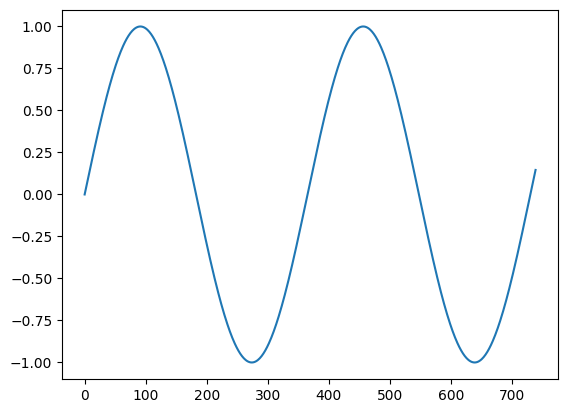

In [20]:
df1.iloc[0:740, 9].plot()

In [21]:
df2 = df1.drop(["indexes", "index_second", "YEAR_index_norm"], axis = 1)
df2.head()

date  store  item  sales  id  YEAR_cos_index  YEAR_sin_index
0 2013-01-01      1     1   13.0 NaN        1.000000        0.000000
1 2013-01-02      1     1   11.0 NaN        0.999852        0.017202
2 2013-01-03      1     1   14.0 NaN        0.999408        0.034399
3 2013-01-04      1     1   13.0 NaN        0.998669        0.051585
4 2013-01-05      1     1   10.0 NaN        0.997633        0.068757

In [22]:
def create_date_time_features(df) : 
    df = df.copy()
    df['dayofweek'] = df.date.dt.dayofweek
    df['quarter'] = df.date.dt.quarter
    df['month'] = df.date.dt.month
    df['year'] = df.date.dt.year 
    df['dayofyear'] = df.date.dt.dayofyear
    df['dayofmonth'] = df.date.dt.day
    df['weekofyear'] = df.date.dt.isocalendar().week.astype("int64")
    df["season"] = np.where(df.month.isin([12, 1, 2]), 0, 1)
    df["season"] = np.where(df.month.isin([6, 7, 8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 12]), 3, df["season"])
    return df

In [23]:
df3 = df2.copy()
df3 = create_date_time_features(df3)
df3

date  store  item  sales       id  YEAR_cos_index  YEAR_sin_index  \
0     2013-01-01      1     1   13.0      NaN        1.000000        0.000000   
1     2013-01-02      1     1   11.0      NaN        0.999852        0.017202   
2     2013-01-03      1     1   14.0      NaN        0.999408        0.034399   
3     2013-01-04      1     1   13.0      NaN        0.998669        0.051585   
4     2013-01-05      1     1   10.0      NaN        0.997633        0.068757   
...          ...    ...   ...    ...      ...             ...             ...   
44995 2018-03-27     10    50    NaN  44995.0        1.000000        0.000000   
44996 2018-03-28     10    50    NaN  44996.0        1.000000        0.000000   
44997 2018-03-29     10    50    NaN  44997.0        1.000000        0.000000   
44998 2018-03-30     10    50    NaN  44998.0        1.000000        0.000000   
44999 2018-03-31     10    50    NaN  44999.0        1.000000        0.000000   

       dayofweek  quarter  month  year  dayofyear  dayofmonth  weekofyear  \
0              1        1      1  2013          1           1           1   
1              2        1      1  2013          2           2           1   
2              3        1      1  2013          3           3           1   
3              4        1      1  2013          4           4           1   
4              5        1      1  2013          5           5           1   
...          ...      ...    ...   ...        ...         ...         ...   
44995          1        1      3  2018         86          27          13   
44996          2        1      3  2018         87          28          13   
44997          3        1      3  2018         88          29          13   
44998          4        1      3  2018         89          30          13   
44999          5        1      3  2018         90          31          13   

       season  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
44995       1  
44996       1  
44997       1  
44998       1  
44999       1  

[958000 rows x 15 columns]

In [24]:
def lag_features(df, lags) : 
    for lag in lags :
        df['sales_lag_' + str(lag)] = df.groupby(["store", "item"]) ['sales'].transform(lambda x : x.shift(lag))
        df.fillna(0, inplace= True)
    return df

In [25]:

df4 = df3.copy()
lag_features(df4, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])
df4

date  store  item  sales       id  YEAR_cos_index  YEAR_sin_index  \
0     2013-01-01      1     1   13.0      0.0        1.000000        0.000000   
1     2013-01-02      1     1   11.0      0.0        0.999852        0.017202   
2     2013-01-03      1     1   14.0      0.0        0.999408        0.034399   
3     2013-01-04      1     1   13.0      0.0        0.998669        0.051585   
4     2013-01-05      1     1   10.0      0.0        0.997633        0.068757   
...          ...    ...   ...    ...      ...             ...             ...   
44995 2018-03-27     10    50    0.0  44995.0        1.000000        0.000000   
44996 2018-03-28     10    50    0.0  44996.0        1.000000        0.000000   
44997 2018-03-29     10    50    0.0  44997.0        1.000000        0.000000   
44998 2018-03-30     10    50    0.0  44998.0        1.000000        0.000000   
44999 2018-03-31     10    50    0.0  44999.0        1.000000        0.000000   

       dayofweek  quarter  month  ...  sales_lag_91  sales_lag_98  \
0              1        1      1  ...           0.0           0.0   
1              2        1      1  ...           0.0           0.0   
2              3        1      1  ...           0.0           0.0   
3              4        1      1  ...           0.0           0.0   
4              5        1      1  ...           0.0           0.0   
...          ...      ...    ...  ...           ...           ...   
44995          1        1      3  ...          41.0          54.0   
44996          2        1      3  ...          63.0          51.0   
44997          3        1      3  ...          59.0          63.0   
44998          4        1      3  ...          74.0          75.0   
44999          5        1      3  ...          62.0          70.0   

       sales_lag_105  sales_lag_112  sales_lag_119  sales_lag_126  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
44995           67.0           68.0           68.0           81.0   
44996           67.0           60.0           76.0           81.0   
44997           72.0           66.0           73.0           87.0   
44998           72.0           67.0           66.0           81.0   
44999           52.0           69.0           49.0           78.0   

       sales_lag_182  sales_lag_364  sales_lag_546  sales_lag_728  
0                0.0            0.0            0.0            0.0  
1                0.0            0.0            0.0            0.0  
2                0.0            0.0            0.0            0.0  
3                0.0            0.0            0.0            0.0  
4                0.0            0.0            0.0            0.0  
...              ...            ...            ...            ...  
44995           79.0           60.0           97.0           73.0  
44996           80.0           73.0           80.0           68.0  
44997           82.0           68.0           99.0           75.0  
44998           90.0           69.0           79.0           83.0  
44999          103.0          101.0           97.0           82.0  

[958000 rows x 25 columns]

In [26]:
def roll_mean_features(df, windows) : 
    for window in windows : 
        df['sales_roll_mean' + str(window)] = df.groupby(["store", "item"])['sales'].transform(lambda x: x.shift(1).rolling(window=window, min_periods = 10, win_type = "triang").mean())
        df.fillna(0, inplace = True)
    return df

In [27]:
df5 = df4.copy()
df5 = roll_mean_features(df5, [365, 546])
df5.tail(10)

date  store  item  sales       id  YEAR_cos_index  YEAR_sin_index  \
44990 2018-03-22     10    50    0.0  44990.0             1.0             0.0   
44991 2018-03-23     10    50    0.0  44991.0             1.0             0.0   
44992 2018-03-24     10    50    0.0  44992.0             1.0             0.0   
44993 2018-03-25     10    50    0.0  44993.0             1.0             0.0   
44994 2018-03-26     10    50    0.0  44994.0             1.0             0.0   
44995 2018-03-27     10    50    0.0  44995.0             1.0             0.0   
44996 2018-03-28     10    50    0.0  44996.0             1.0             0.0   
44997 2018-03-29     10    50    0.0  44997.0             1.0             0.0   
44998 2018-03-30     10    50    0.0  44998.0             1.0             0.0   
44999 2018-03-31     10    50    0.0  44999.0             1.0             0.0   

       dayofweek  quarter  month  ...  sales_lag_105  sales_lag_112  \
44990          3        1      3  ...           66.0           73.0   
44991          4        1      3  ...           67.0           66.0   
44992          5        1      3  ...           69.0           49.0   
44993          6        1      3  ...           69.0           75.0   
44994          0        1      3  ...           54.0           54.0   
44995          1        1      3  ...           67.0           68.0   
44996          2        1      3  ...           67.0           60.0   
44997          3        1      3  ...           72.0           66.0   
44998          4        1      3  ...           72.0           67.0   
44999          5        1      3  ...           52.0           69.0   

       sales_lag_119  sales_lag_126  sales_lag_182  sales_lag_364  \
44990           87.0           84.0           89.0           67.0   
44991           81.0           95.0           97.0           73.0   
44992           78.0           99.0           97.0           79.0   
44993          113.0           88.0           99.0           81.0   
44994           75.0           62.0           63.0           66.0   
44995           68.0           81.0           79.0           60.0   
44996           76.0           81.0           80.0           73.0   
44997           73.0           87.0           82.0           68.0   
44998           66.0           81.0           90.0           69.0   
44999           49.0           78.0          103.0          101.0   

       sales_lag_546  sales_lag_728  sales_roll_mean365  sales_roll_mean546  
44990           89.0           73.0           79.880528           82.067725  
44991           82.0           74.0           79.602795           82.006078  
44992           97.0           79.0           79.321449           81.943042  
44993          114.0           83.0           79.036310           81.878175  
44994           46.0           51.0           78.747559           81.811557  
44995           97.0           73.0           78.455254           81.743476  
44996           80.0           68.0           78.161605           81.674140  
44997           99.0           75.0           77.865209           81.603658  
44998           79.0           83.0           77.565828           81.531518  
44999           97.0           82.0           77.263728           81.457433  

[10 rows x 27 columns]

In [28]:
def ewm_features (dataframe, alphas, lags) : 
    for alpha in alphas : 
        for lag in lags :
            dataframe['sales_ewm_alpha_' + str(lag)] = dataframe.groupby(["store", "item"])['sales'].transform(lambda x : x.shift(lag).ewm(alpha=alpha).mean())
        dataframe.fillna(0,inplace = True)
        return dataframe

In [29]:
df6 = df5.copy()
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91, 98, 105, 112, 180, 270, 365, 546, 728]
df6 = ewm_features(df6, alphas, lags)
df6.tail()

date  store  item  sales       id  YEAR_cos_index  YEAR_sin_index  \
44995 2018-03-27     10    50    0.0  44995.0             1.0             0.0   
44996 2018-03-28     10    50    0.0  44996.0             1.0             0.0   
44997 2018-03-29     10    50    0.0  44997.0             1.0             0.0   
44998 2018-03-30     10    50    0.0  44998.0             1.0             0.0   
44999 2018-03-31     10    50    0.0  44999.0             1.0             0.0   

       dayofweek  quarter  month  ...  sales_roll_mean546  sales_ewm_alpha_91  \
44995          1        1      3  ...           81.743476           41.561777   
44996          2        1      3  ...           81.674140           61.928089   
44997          3        1      3  ...           81.603658           59.146404   
44998          4        1      3  ...           81.531518           73.257320   
44999          5        1      3  ...           81.457433           62.562866   

       sales_ewm_alpha_98  sales_ewm_alpha_105  sales_ewm_alpha_112  \
44995           54.028375            66.387487            67.349358   
44996           51.151419            66.969374            60.367468   
44997           62.407571            71.748469            65.718373   
44998           74.370379            71.987423            66.935919   
44999           70.218519            52.999371            68.896796   

       sales_ewm_alpha_180  sales_ewm_alpha_270  sales_ewm_alpha_365  \
44995            81.895724           112.421502            66.744209   
44996            89.594786           118.671075            60.337210   
44997           102.329739           119.933554            72.366861   
44998            99.166487           100.046678            68.218343   
44999            72.408324            98.102334            68.960917   

       sales_ewm_alpha_546  sales_ewm_alpha_728  
44995            94.617783            71.979468  
44996            80.730889            68.198973  
44997            98.086544            74.659949  
44998            79.954327            82.582997  
44999            96.147716            82.029150  

[5 rows x 36 columns]

In [30]:
df7 = pd.get_dummies(df6, columns=['store', 'item', 'dayofweek', "quarter", 'month', "year", "season"])
df7.head()

date  sales   id  YEAR_cos_index  YEAR_sin_index  dayofyear  \
0 2013-01-01   13.0  0.0        1.000000        0.000000          1   
1 2013-01-02   11.0  0.0        0.999852        0.017202          2   
2 2013-01-03   14.0  0.0        0.999408        0.034399          3   
3 2013-01-04   13.0  0.0        0.998669        0.051585          4   
4 2013-01-05   10.0  0.0        0.997633        0.068757          5   

   dayofmonth  weekofyear  sales_lag_91  sales_lag_98  ...  year_2013  \
0           1           1           0.0           0.0  ...       True   
1           2           1           0.0           0.0  ...       True   
2           3           1           0.0           0.0  ...       True   
3           4           1           0.0           0.0  ...       True   
4           5           1           0.0           0.0  ...       True   

   year_2014  year_2015  year_2016  year_2017  year_2018  season_0  season_1  \
0      False      False      False      False      False      True     False   
1      False      False      False      False      False      True     False   
2      False      False      False      False      False      True     False   
3      False      False      False      False      False      True     False   
4      False      False      False      False      False      True     False   

   season_2  season_3  
0     False     False  
1     False     False  
2     False     False  
3     False     False  
4     False     False  

[5 rows x 122 columns]

In [31]:
df7['sales'] = np.log1p(df7["sales"].values)
df7.head()

date     sales   id  YEAR_cos_index  YEAR_sin_index  dayofyear  \
0 2013-01-01  2.639057  0.0        1.000000        0.000000          1   
1 2013-01-02  2.484907  0.0        0.999852        0.017202          2   
2 2013-01-03  2.708050  0.0        0.999408        0.034399          3   
3 2013-01-04  2.639057  0.0        0.998669        0.051585          4   
4 2013-01-05  2.397895  0.0        0.997633        0.068757          5   

   dayofmonth  weekofyear  sales_lag_91  sales_lag_98  ...  year_2013  \
0           1           1           0.0           0.0  ...       True   
1           2           1           0.0           0.0  ...       True   
2           3           1           0.0           0.0  ...       True   
3           4           1           0.0           0.0  ...       True   
4           5           1           0.0           0.0  ...       True   

   year_2014  year_2015  year_2016  year_2017  year_2018  season_0  season_1  \
0      False      False      False      False      False      True     False   
1      False      False      False      False      False      True     False   
2      False      False      False      False      False      True     False   
3      False      False      False      False      False      True     False   
4      False      False      False      False      False      True     False   

   season_2  season_3  
0     False     False  
1     False     False  
2     False     False  
3     False     False  
4     False     False  

[5 rows x 122 columns]

In [32]:
print(df7['sales'].max())
print(df7['sales'].min())
print(df7['sales'].mean())

5.44673737166631
0.0
3.6409859416919224


In [33]:
df_model = df7.copy()
df_model = df_model.sort_values("date").reset_index(drop = True)
train = df_model.loc[(df_model["date"] < "2017-01-01"), :]
val = df_model.loc[(df_model["date"] >= "2017-01-01") & (df_model["date"] < "2017-04-01"), :]
train


date     sales   id  YEAR_cos_index  YEAR_sin_index  dayofyear  \
0      2013-01-01  2.639057  0.0        1.000000        0.000000          1   
1      2013-01-01  2.833213  0.0        1.000000        0.000000          1   
2      2013-01-01  3.044522  0.0        1.000000        0.000000          1   
3      2013-01-01  3.555348  0.0        1.000000        0.000000          1   
4      2013-01-01  2.995732  0.0        1.000000        0.000000          1   
...           ...       ...  ...             ...             ...        ...   
730495 2016-12-31  4.060443  0.0        0.999861       -0.016686        366   
730496 2016-12-31  3.610918  0.0        0.999861       -0.016686        366   
730497 2016-12-31  3.367296  0.0        0.999861       -0.016686        366   
730498 2016-12-31  4.025352  0.0        0.999861       -0.016686        366   
730499 2016-12-31  3.465736  0.0        0.999861       -0.016686        366   

        dayofmonth  weekofyear  sales_lag_91  sales_lag_98  ...  year_2013  \
0                1           1           0.0           0.0  ...       True   
1                1           1           0.0           0.0  ...       True   
2                1           1           0.0           0.0  ...       True   
3                1           1           0.0           0.0  ...       True   
4                1           1           0.0           0.0  ...       True   
...            ...         ...           ...           ...  ...        ...   
730495          31          52          75.0          61.0  ...      False   
730496          31          52          48.0          54.0  ...      False   
730497          31          52          44.0          33.0  ...      False   
730498          31          52          59.0          75.0  ...      False   
730499          31          52          53.0          48.0  ...      False   

        year_2014  year_2015  year_2016  year_2017  year_2018  season_0  \
0           False      False      False      False      False      True   
1           False      False      False      False      False      True   
2           False      False      False      False      False      True   
3           False      False      False      False      False      True   
4           False      False      False      False      False      True   
...           ...        ...        ...        ...        ...       ...   
730495      False      False       True      False      False     False   
730496      False      False       True      False      False     False   
730497      False      False       True      False      False     False   
730498      False      False       True      False      False     False   
730499      False      False       True      False      False     False   

        season_1  season_2  season_3  
0          False     False     False  
1          False     False     False  
2          False     False     False  
3          False     False     False  
4          False     False     False  
...          ...       ...       ...  
730495     False     False      True  
730496     False     False      True  
730497     False     False      True  
730498     False     False      True  
730499     False     False      True  

[730500 rows x 122 columns]

In [34]:
cols = [col for col in train.columns if col not in ['date', 'id', "sales", "year"]]
X_train = train[cols]
Y_train = train['sales']
X_val = val[cols]
Y_val = val['sales']
X_train


YEAR_cos_index  YEAR_sin_index  dayofyear  dayofmonth  weekofyear  \
0             1.000000        0.000000          1           1           1   
1             1.000000        0.000000          1           1           1   
2             1.000000        0.000000          1           1           1   
3             1.000000        0.000000          1           1           1   
4             1.000000        0.000000          1           1           1   
...                ...             ...        ...         ...         ...   
730495        0.999861       -0.016686        366          31          52   
730496        0.999861       -0.016686        366          31          52   
730497        0.999861       -0.016686        366          31          52   
730498        0.999861       -0.016686        366          31          52   
730499        0.999861       -0.016686        366          31          52   

        sales_lag_91  sales_lag_98  sales_lag_105  sales_lag_112  \
0                0.0           0.0            0.0            0.0   
1                0.0           0.0            0.0            0.0   
2                0.0           0.0            0.0            0.0   
3                0.0           0.0            0.0            0.0   
4                0.0           0.0            0.0            0.0   
...              ...           ...            ...            ...   
730495          75.0          61.0           88.0           65.0   
730496          48.0          54.0           53.0           49.0   
730497          44.0          33.0           35.0           32.0   
730498          59.0          75.0           73.0           58.0   
730499          53.0          48.0           59.0           62.0   

        sales_lag_119  ...  year_2013  year_2014  year_2015  year_2016  \
0                 0.0  ...       True      False      False      False   
1                 0.0  ...       True      False      False      False   
2                 0.0  ...       True      False      False      False   
3                 0.0  ...       True      False      False      False   
4                 0.0  ...       True      False      False      False   
...               ...  ...        ...        ...        ...        ...   
730495           52.0  ...      False      False      False       True   
730496           46.0  ...      False      False      False       True   
730497           47.0  ...      False      False      False       True   
730498           68.0  ...      False      False      False       True   
730499           60.0  ...      False      False      False       True   

        year_2017  year_2018  season_0  season_1  season_2  season_3  
0           False      False      True     False     False     False  
1           False      False      True     False     False     False  
2           False      False      True     False     False     False  
3           False      False      True     False     False     False  
4           False      False      True     False     False     False  
...           ...        ...       ...       ...       ...       ...  
730495      False      False     False     False     False      True  
730496      False      False     False     False     False      True  
730497      False      False     False     False     False      True  
730498      False      False     False     False     False      True  
730499      False      False     False     False     False      True  

[730500 rows x 119 columns]

In [35]:
!pip install --upgrade tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dropout,Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import metrics 

# X_train = np.random.rand(100,10)
# Y_train = np.random.rand(100,1)
NN_model = Sequential()
NN_model.add(Dense(128, kernel_initializer = 'normal', input_dim = X_train.shape[1], activation = 'relu'))
NN_model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
NN_model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
NN_model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
NN_model.compile(loss= tf.keras.losses.mae, optimizer = "adam", metrics = ['mae'])
NN_model.summary

/opt/homebrew/Caskroom/miniforge/base/envs/aienv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



<bound method Model.summary of <Sequential name=sequential_3, built=True>>

In [36]:
NN_model.fit(X_train, Y_train, epochs = 2, batch_size = 32, validation_split = 0.2)


Epoch 1/2
18263/18263 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 0.2478 - mae: 0.2478 - val_loss: 0.1436 - val_mae: 0.1436
Epoch 2/2
18263/18263 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 0.1564 - mae: 0.1564 - val_loss: 0.1195 - val_mae: 0.1195


In [37]:

train_predictions = NN_model.predict(X_val).flatten()
train_results = pd.DataFrame(data={'Train Predictions': np.expm1(train_predictions), 'Actuals':np.expm1(Y_val)})
train_results

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step


Train Predictions  Actuals
730500          38.637691     38.0
730501         113.394623    107.0
730502          67.720345     58.0
730503          25.456760     26.0
730504          32.769295     28.0
...                   ...      ...
775495          92.483246     81.0
775496          35.843208     34.0
775497          38.119598     43.0
775498          61.394356     53.0
775499          30.574043     33.0

[45000 rows x 2 columns]

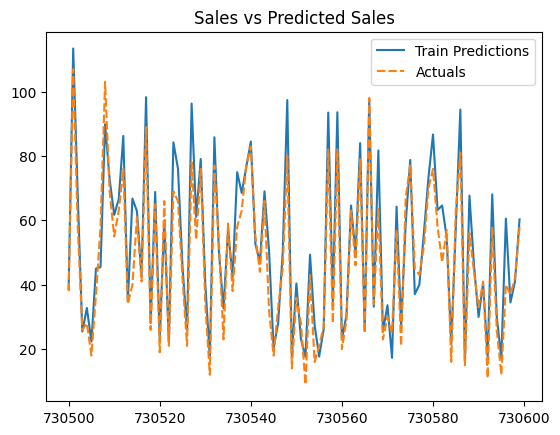

In [38]:
sns.lineplot(train_results.head(100))
plt.title("Sales vs Predicted Sales")
plt.show()

In [39]:
df_final_model = df7.copy()
test = df_final_model.loc[(df_final_model["date"] >= "2018-01-01"), :]
X_test = test[cols]
X_test

YEAR_cos_index  YEAR_sin_index  dayofyear  dayofmonth  weekofyear  \
0                 1.0             0.0          1           1           1   
1                 1.0             0.0          2           2           1   
2                 1.0             0.0          3           3           1   
3                 1.0             0.0          4           4           1   
4                 1.0             0.0          5           5           1   
...               ...             ...        ...         ...         ...   
44995             1.0             0.0         86          27          13   
44996             1.0             0.0         87          28          13   
44997             1.0             0.0         88          29          13   
44998             1.0             0.0         89          30          13   
44999             1.0             0.0         90          31          13   

       sales_lag_91  sales_lag_98  sales_lag_105  sales_lag_112  \
0              12.0          14.0           22.0           16.0   
1              18.0          18.0           21.0           20.0   
2              15.0          27.0           20.0           13.0   
3              20.0          23.0           20.0           26.0   
4              19.0          28.0           28.0           28.0   
...             ...           ...            ...            ...   
44995          41.0          54.0           67.0           68.0   
44996          63.0          51.0           67.0           60.0   
44997          59.0          63.0           72.0           66.0   
44998          74.0          75.0           72.0           67.0   
44999          62.0          70.0           52.0           69.0   

       sales_lag_119  ...  year_2013  year_2014  year_2015  year_2016  \
0               12.0  ...      False      False      False      False   
1               26.0  ...      False      False      False      False   
2               24.0  ...      False      False      False      False   
3               29.0  ...      False      False      False      False   
4               28.0  ...      False      False      False      False   
...              ...  ...        ...        ...        ...        ...   
44995           68.0  ...      False      False      False      False   
44996           76.0  ...      False      False      False      False   
44997           73.0  ...      False      False      False      False   
44998           66.0  ...      False      False      False      False   
44999           49.0  ...      False      False      False      False   

       year_2017  year_2018  season_0  season_1  season_2  season_3  
0          False       True      True     False     False     False  
1          False       True      True     False     False     False  
2          False       True      True     False     False     False  
3          False       True      True     False     False     False  
4          False       True      True     False     False     False  
...          ...        ...       ...       ...       ...       ...  
44995      False       True     False      True     False     False  
44996      False       True     False      True     False     False  
44997      False       True     False      True     False     False  
44998      False       True     False      True     False     False  
44999      False       True     False      True     False     False  

[45000 rows x 119 columns]

In [41]:
test_predictions = NN_model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':np.expm1(test_predictions)})
test_results

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step


Test Predictions
0             13.033278
1             15.570083
2             15.393002
3             16.404999
4             17.271254
...                 ...
44995         67.614456
44996         70.819092
44997         73.196602
44998         78.055161
44999         83.854820

[45000 rows x 1 columns]

In [45]:
new_test = pd.read_csv('test.csv', parse_dates = ['date'])
result_df = test.loc[:, ['id', 'sales']]
result_df['sales'] = np.expm1(test_predictions)
result_df = pd.concat([new_test, result_df], axis = 1)
result_df = result_df.drop('id', axis = 1)
result_df

date  store  item      sales
0     2018-01-01      1     1  13.033278
1     2018-01-02      1     1  15.570083
2     2018-01-03      1     1  15.393002
3     2018-01-04      1     1  16.404999
4     2018-01-05      1     1  17.271254
...          ...    ...   ...        ...
44995 2018-03-27     10    50  67.614456
44996 2018-03-28     10    50  70.819092
44997 2018-03-29     10    50  73.196602
44998 2018-03-30     10    50  78.055161
44999 2018-03-31     10    50  83.854820

[45000 rows x 4 columns]

In [48]:
result_df.to_csv('result_prediction.csv', index=False)

In [47]:
train = pd.read_csv('train.csv', parse_dates= ['date'])
plot_test = pd.concat([train, result_df], axis = 0).reset_index()
plot_test

index       date  store  item      sales
0           0 2013-01-01      1     1  13.000000
1           1 2013-01-02      1     1  11.000000
2           2 2013-01-03      1     1  14.000000
3           3 2013-01-04      1     1  13.000000
4           4 2013-01-05      1     1  10.000000
...       ...        ...    ...   ...        ...
957995  44995 2018-03-27     10    50  67.614456
957996  44996 2018-03-28     10    50  70.819092
957997  44997 2018-03-29     10    50  73.196602
957998  44998 2018-03-30     10    50  78.055161
957999  44999 2018-03-31     10    50  83.854820

[958000 rows x 5 columns]

In [49]:
sc = go.Scatter(x=daily_result['date'], y=daily_result['sales'])
layout = go.Layout(title = 'Daily sales', xaxis = dict(title='Date'), yaxis = dict(title='Sales'))
fig = go.Figure(data = [sc], layout=layout)
iplot(fig)

NameError: name 'daily_result' is not defined